
<div style="text-align: center; line-height: 0; padding-top: 9px;">  
  <img src="/dbfs/mnt/preventech/data/user_files/gf591/ML/fruits-360/MyProducePal_Logo.PNG" alt="Image">  
</div> 

In [0]:
pip install torchinfo


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install torchbearer

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.utils.data.dataloader
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets
import os
from torch.utils.data import DataLoader
from torchvision import transforms
from typing import Tuple,Dict,List
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torchvision
import random
from pathlib import Path
from torchinfo import summary


In [0]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [0]:
#define dataloader and class_names
def create_dataloaders(
    train_dir:str,
    test_dir:str,
    train_transforms:transforms.Compose,
    test_transforms:transforms.Compose,
    batch_size:int,
    num_workers:int=2
):
    #select all image and implement selected transform and turn into tensor
    train_data=datasets.ImageFolder(train_dir,transform=train_transforms)
    test_data=datasets.ImageFolder(test_dir,transform=test_transforms)

    #ImageFolder class have a variable about folder names under the selected path
    class_names=train_data.classes


    train_dataloader=DataLoader(
        train_data,
        batch_size=batch_size, #how many image should select in each iter
        shuffle=True, #mix the data
        num_workers=num_workers,
        pin_memory=True
    )

    test_dataloader=DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader,test_dataloader,class_names

In [0]:
#path: /Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fruits-360/Training/
data_path=Path("/dbfs/mnt/preventech/data/user_files/gf591/ML/fruits-360/Test/")
train_dir=data_path /"Training"
test_dir=data_path /"Test"


In [0]:
import torchvision.transforms as transforms

# Define custom transform to divide images by 255
custom_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x )
])

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transforms=custom_transform,
    test_transforms=custom_transform,
    batch_size=32
)

In [0]:
# type(train_dataloader),train_dataloader.shape


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


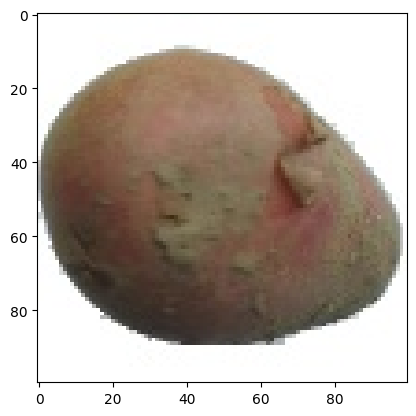

In [0]:
import torch  
import matplotlib.pyplot as plt  
import numpy as np  
  
# Get the first batch of images from the dataloader  
images, labels = next(iter(train_dataloader))  
# print(labels)
# Select the first image in the batch  
image = images[4]  
print(image)

# Convert the PyTorch tensor to a numpy array  
image = np.transpose(image.numpy(), (1, 2, 0))  
  
# Plot the image  
plt.imshow(image)  
plt.show()  

In [0]:
np.max(image),np.min(image)

(1.0, 0.0627451)

In [0]:
class_names

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple hit 1',
 'Apricot 1',
 'Avocado 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Beetroot 1',
 'Blueberry 1',
 'Cabbage white 1',
 'Cactus fruit 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Carrot 1',
 'Cauliflower 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Chestnut 1',
 'Clementine 1',
 'Cocos 1',
 'Corn 1',
 'Corn Husk 1',
 'Cucumber 1',
 'Cucumber 3',
 'Cucumber Ripe 1',
 'Cucumber Ripe 2',
 'Dates 1',
 'Eggplant 1',
 'Eggplant long 1',
 'Fig 1',
 'Ginger Root 1',
 'Granadilla 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White

In [0]:
len(class_names)

141

In [0]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch,(image,label) in enumerate(data_loader):
        image,label=image.to(device),label.to(device)
        
        y_pred=model(image)
        
        loss=loss_fn(y_pred,label)
        
        train_loss+=loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
        
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc +=(y_pred_class==label).sum().item()/len(y_pred)
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader) 
    return train_loss,train_acc

def test_step(model:torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device:torch.device =device): 
    test_loss,test_acc=0,0
    
    model.eval()
    with torch.inference_mode():
        for batch,(image,label) in enumerate(data_loader):
            image,label=image.to(device),label.to(device)
            
            test_pred_logits=model(image)
            
            loss=loss_fn(test_pred_logits,label)
            test_loss += loss.item()
            
            test_pred_labels=test_pred_logits.argmax(dim=1)
            
            test_acc+= ((test_pred_labels==label).sum().item()/len(test_pred_labels))
            
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
    return test_loss,test_acc   

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int=5,
          device=device,
          metrics: dict = None,
          callbacks: list = None):
    results={"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
    if callbacks is None:
        callbacks = []
    
    if metrics:
        for name, metric_fn in metrics.items():
            train_metric = metric_fn(model, train_dataloader, device)
            test_metric = metric_fn(model, test_dataloader, device)
            results[f"train_{name}"].append(train_metric)
            results[f"test_{name}"].append(test_metric)
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model=model,
                                       data_loader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
        test_loss,test_acc=test_step(model=model,
                                       data_loader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)
        print(f"Epoch:{epoch}| train_loss:{train_loss:.4f}|train_acc:{train_acc:.4f}|test_loss:{test_loss:.4f}|test_acc:{test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results


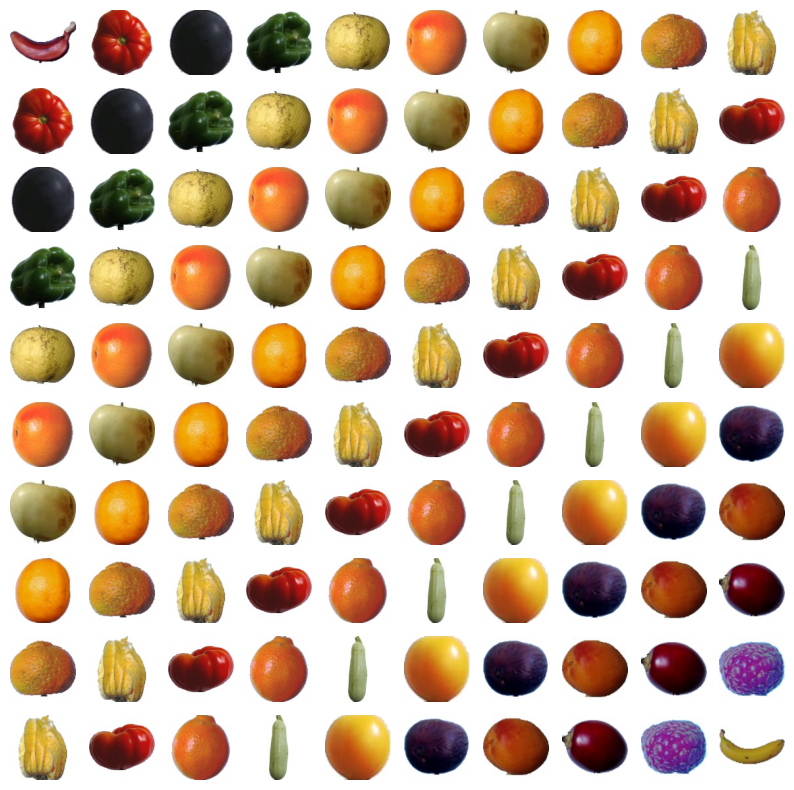

In [0]:
# plot all images in the dataset  
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))  
for i in range(10):  
    for j in range(10):  
        # axs[i][j].set_title(class_names[i * 1 + j])
        image = images[i * 1 + j] 
  
        # Convert the PyTorch tensor to a numpy array  
        image = np.transpose(image.numpy(), (1, 2, 0))  
        axs[i][j].imshow(image)  
        axs[i][j].axis('off')  
  
plt.show() 

In [0]:
image.shape

(100, 100, 3)

# FruitsClassifier without SVD

In [0]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
  
class FruitsClassifier(nn.Module):  
    def __init__(self):  
        super(FruitsClassifier, self).__init__()  
        self.fc1 = nn.Linear(100*100*3, 512)  
        self.fc2 = nn.Linear(512, 256)  
        self.fc3 = nn.Linear(256, 141)  
        self.log_softmax = nn.LogSoftmax(dim=1)  
  
    def forward(self, x):  
        x = x.view(-1, 100*100*3)  # Flatten input image  
        x = nn.functional.relu(self.fc1(x))  
        x = nn.functional.relu(self.fc2(x))  
        x = self.fc3(x)  
        x = self.log_softmax(x)  
        return x  
  
# Instantiate the model  
model_basic = FruitsClassifier()  
  
# Define the loss function and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model_basic.parameters(), lr=0.001)  

# FruitsClassifier with SVD

In [0]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
import numpy as np  
  
class FruitsClassifierSVD(nn.Module):  
    def __init__(self, rank):  
        super(FruitsClassifierSVD, self).__init__()  
        self.fc1 = nn.Linear(100*100*3, rank)  
        self.fc2 = nn.Linear(rank, rank)  
        self.fc3 = nn.Linear(rank, 141)  
        self.log_softmax = nn.LogSoftmax(dim=1)  
  
    def forward(self, x):  
        x = x.view(-1, 100*100*3)  # Flatten input image  
        x = nn.functional.relu(self.fc1(x))  
        x = nn.functional.relu(self.fc2(x))  
        x = self.fc3(x)  
        x = self.log_softmax(x)  
        return x  
  
    def apply_svd(self, rank):  
        for name, module in self.named_modules():  
            if isinstance(module, nn.Linear):  
                weight = module.weight.data.cpu().numpy()  
                U, S, V = np.linalg.svd(weight, full_matrices=False)  
                U = torch.from_numpy(U[:, :rank]).to(device)  
                S = torch.from_numpy(np.diag(S[:rank])).to(device)  
                V = torch.from_numpy(V[:rank, :]).to(device)  
                module.weight.data = torch.nn.Parameter(torch.mm(U, torch.mm(S, V)))  
                module.bias.data.fill_(0.0)  
  
# Instantiate the model  
model_basic_svd = FruitsClassifierSVD(rank=512)  
  
# Apply SVD to the weight matrices  
model_basic_svd.apply_svd(rank=256)  
  
# Define the loss function and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model_basic_svd.parameters(), lr=0.001)  


In [0]:
# model_basic.summary()
summary(model=model_basic_svd,
       input_size=(32,3,100,100),
       col_names=["input_size","output_size","num_params","trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
FruitsClassifierSVD (FruitsClassifierSVD)     [32, 3, 100, 100]    [32, 141]            --                   True
├─Linear (fc1)                                [32, 30000]          [32, 512]            15,360,512           True
├─Linear (fc2)                                [32, 512]            [32, 512]            262,656              True
├─Linear (fc3)                                [32, 512]            [32, 141]            72,333               True
├─LogSoftmax (log_softmax)                    [32, 141]            [32, 141]            --                   --
Total params: 15,695,501
Trainable params: 15,695,501
Non-trainable params: 0
Total mult-adds (M): 502.26
Input size (MB): 3.84
Forward/backward pass size (MB): 0.30
Params size (MB): 62.78
Estimated Total Size (MB): 66.92

In [0]:
# %python
# import torch.optim as optim  
# import torchbearer  
# from torchbearer import Trial  
  
# # Define the early stopping callback  
# early_stopping = torchbearer.callbacks.EarlyStopping(patience=5, monitor='val_loss')  
  
# # Move the model to the device  
# model_basic_svd.to(device)  
 
# # Define the metrics as a dictionary
# metrics = {
#     # 'loss': torchbearer.metrics.loss,
#     # 'accuracy': torchbearer.metrics.Accuracy()
# }

# # Train the model using the train function  
# results_model_basic_svd = train(model=model_basic_svd,  
#                             train_dataloader=train_dataloader,  
#                             test_dataloader=test_dataloader,  
#                             optimizer=optimizer,  
#                             loss_fn=criterion,  
#                             device=device,
#                             callbacks=[early_stopping]    
#                             ).with_generators(train_generator=train_dataloader,    
#                                                        val_generator=test_dataloader,    
#                                                        steps=len(train_dataloader)).run(epochs=25)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0| train_loss:0.7426|train_acc:0.7948|test_loss:0.8404|test_acc:0.7891
Epoch:1| train_loss:0.2181|train_acc:0.9327|test_loss:1.1427|test_acc:0.7855
Epoch:2| train_loss:0.1677|train_acc:0.9510|test_loss:0.8675|test_acc:0.8595
Epoch:3| train_loss:0.1383|train_acc:0.9621|test_loss:1.1892|test_acc:0.8315
Epoch:4| train_loss:0.1515|train_acc:0.9617|test_loss:0.8670|test_acc:0.8942


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-2833716398704502>, line 25
     12 metrics = {
     13     # 'loss': torchbearer.metrics.loss,
     14     # 'accuracy': torchbearer.metrics.Accuracy()
     15 }
     17 # Train the model using the train function  
     18 results_model_basic_svd = train(model=model_basic_svd,  
     19                             train_dataloader=train_dataloader,  
     20                             test_dataloader=test_dataloader,  
     21                             optimizer=optimizer,  
     22                             loss_fn=criterion,  
     23                             device=device,
     24                             callbacks=[early_stopping]    
---> 25                             ).with_generators(train_generator=train_dataloader,    
     26                                                        val_generator=test_da

In [0]:
import torch.optim as optim  
import torchbearer  
from torchbearer import Trial  
  
# Define the early stopping callback  
early_stopping = torchbearer.callbacks.EarlyStopping(patience=5, monitor='val_loss')  
  
# Move the model to the device  
model_basic_svd.to(device)  

# Define the trial with the early stopping callback
trial = Trial(model_basic_svd, 
              optimizer, 
              criterion, 
              metrics=['loss', 'accuracy'], 
              callbacks=[early_stopping]).to(device)

# Train the model using the trial
results_model_basic_svd = trial.with_generators(train_generator=train_dataloader,    
                                                val_generator=test_dataloader).run(epochs=10)

0/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

In [0]:
results_model_basic_svd

[{'running_loss': 0.26336565613746643,
  'running_acc': 0.92249995470047,
  'loss': 0.7481601238250732,
  'acc': 0.7884268760681152,
  'val_loss': 0.7270652055740356,
  'val_acc': 0.8200600743293762,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 0.14288701117038727,
  'running_acc': 0.9524999856948853,
  'loss': 0.2119632512331009,
  'acc': 0.9338638782501221,
  'val_loss': 0.6897075772285461,
  'val_acc': 0.8676488995552063,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 0.07141399383544922,
  'running_acc': 0.9762499928474426,
  'loss': 0.17020444571971893,
  'acc': 0.9505610466003418,
  'val_loss': 0.6778312921524048,
  'val_acc': 0.8725178837776184,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 0.15933634340763092,
  'running_acc': 0.9624999761581421,
  'loss': 0.16786913573741913,
  'acc': 0.95661860704422,
  'val_loss': 0.7023849487304688,
  'val_acc': 0.9071086645126343,
  'train_steps': 2203,
  'validation_step

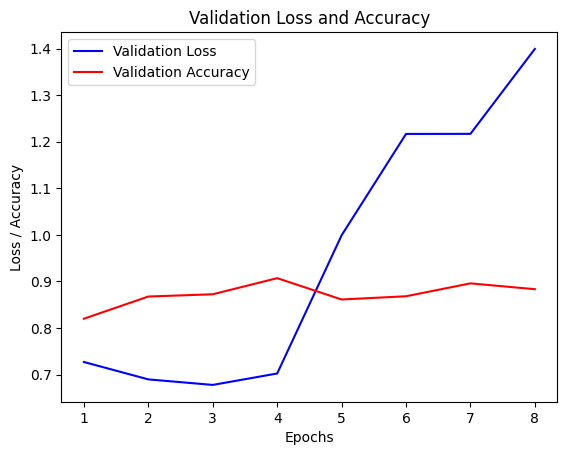

In [0]:
import matplotlib.pyplot as plt  
  
# extract val_loss and val_acc values from results  
val_losses = []  
val_accs = []  
for epoch in results_model_basic_svd:  
    val_losses.append(epoch['val_loss'])  
    val_accs.append(epoch['val_acc'])  
  
# plot val_loss and val_acc over epochs  
epochs = range(1, len(results_model_basic_svd) + 1)  
plt.plot(epochs, val_losses, 'b', label='Validation Loss')  
plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')  
plt.title('Validation Loss and Accuracy')  
plt.xlabel('Epochs')  
plt.ylabel('Loss / Accuracy')  
plt.legend()  
plt.show()  

In [0]:
val_accs

[0.8200600743293762,
 0.8676488995552063,
 0.8725178837776184,
 0.9071086645126343,
 0.8612980842590332,
 0.8682416677474976,
 0.8959311842918396,
 0.8834412693977356]

# Save trained model

In [0]:
# specify the path to save the model  
model_path = '/dbfs/mnt/preventech/data/user_files/gf591/ML/fruits-360/Test/fc_basic_svd_model.pth'  
  
# save the model  
# torch.save(model_vgg16.state_dict(), model_path)  
# Save the state of the model and optimizer  
torch.save({  
    'epoch': 25,  
    'model_state_dict': model_basic_svd.state_dict(),  
    'optimizer_state_dict': optimizer.state_dict(),  
    'loss': np.mean(val_losses),  
    'accuracy': np.mean(val_accs),  
}, model_path)  

# Save model weights

In [0]:
# specify the path to save the weights  
weights_path = '/dbfs/mnt/preventech/data/user_files/gf591/ML/fruits-360/fc_basic_svd_model_weights.pth'  
  
# get the state dict of the model  
model_weights = model_basic_svd.state_dict()  
  
# save the weights  
torch.save(model_weights, weights_path)

# Experiment #2: Initialization, Optimization,Increased SVD Rank, reduced patience in early stopping

In [0]:
import torch.nn.init as init  
import torch.optim as optim  
import torchbearer  
from torchbearer import Trial  

# Instantiate the model  
model_basic_svd_xavier_init = FruitsClassifierSVD(rank=512)  
  
# Apply SVD to the weight matrices  
model_basic_svd_xavier_init.apply_svd(rank=512)  
  
# Define the loss function and optimizer  
criterion = nn.CrossEntropyLoss()  

# Define the early stopping callback  
early_stopping = torchbearer.callbacks.EarlyStopping(patience=3, monitor='val_loss')  
  
# Move the model to the device  
model_basic_svd_xavier_init.to(device)  
  
# Initialize the weights using Xavier initialization  
for m in model_basic_svd_xavier_init.modules():  
    if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):  
        init.xavier_uniform_(m.weight)  
  
# Define the optimizer  
optimizer = optim.Adam(model_basic_svd_xavier_init.parameters(), lr=0.01)  
  
# Define the trial with the early stopping callback  
trial = Trial(model_basic_svd_xavier_init,   
              optimizer,   
              criterion,   
              metrics=['loss', 'accuracy'],   
              callbacks=[early_stopping]).to(device)  
  
# Train the model using the trial  
results_model_basic_svd_xavier_init = trial.with_generators(train_generator=train_dataloader,      
                                                val_generator=test_dataloader).run(epochs=10)

0/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

In [0]:
# results_model_basic_svd_xavier_init

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-4473080898255784>, line 1
----> 1 results_model_basic_svd_xavier_init

NameError: name 'results_model_basic_svd_xavier_init' is not defined

# Experiment #3: Add L2 regularizer to original SVD model

In [0]:
import torch.optim as optim  
import torchbearer  
from torchbearer import Trial  
# Define the L2 regularization parameter and add it to the optimizer  
l2_lambda = 0.001  
model_basic_svd_l2 = model_basic_svd
optimizer = torch.optim.Adam(model_basic_svd_l2.parameters(), lr=0.01, weight_decay=l2_lambda)  
  
# Define the early stopping callback  
early_stopping = torchbearer.callbacks.EarlyStopping(patience=3, monitor='val_loss')  
  
# Move the model to the device  
model_basic_svd_l2.to(device)  

# Define the trial with the early stopping callback
trial = Trial(model_basic_svd_l2, 
              optimizer, 
              criterion, 
              metrics=['loss', 'accuracy'], 
              callbacks=[early_stopping]).to(device)

# Train the model using the trial
results_model_basic_svd_l2 = trial.with_generators(train_generator=train_dataloader,    
                                                val_generator=test_dataloader).run(epochs=10)

0/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/2203 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/739 [00:00<?, ?it/s]

In [0]:
results_model_basic_svd_l2

[{'running_loss': 4.913918972015381,
  'running_acc': 0.019375000149011612,
  'loss': 5.551461219787598,
  'acc': 0.013235731981694698,
  'val_loss': 4.9204230308532715,
  'val_acc': 0.013887124136090279,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 4.925745964050293,
  'running_acc': 0.011874999850988388,
  'loss': 5.374753475189209,
  'acc': 0.013363407924771309,
  'val_loss': 4.921370506286621,
  'val_acc': 0.013887124136090279,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 4.9222493171691895,
  'running_acc': 0.014374999329447746,
  'loss': 5.242795944213867,
  'acc': 0.013335036113858223,
  'val_loss': 4.921084880828857,
  'val_acc': 0.013887124136090279,
  'train_steps': 2203,
  'validation_steps': 739},
 {'running_loss': 4.917822360992432,
  'running_acc': 0.01249999925494194,
  'loss': 6.188014507293701,
  'acc': 0.013562015257775784,
  'val_loss': 4.921914577484131,
  'val_acc': 0.012870993465185165,
  'train_steps': 2203,
  'vali

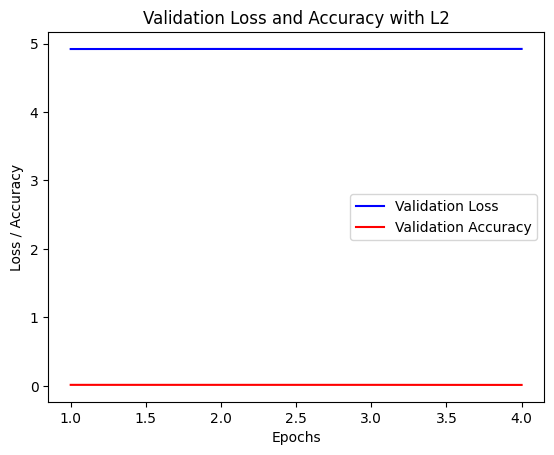

In [0]:
import matplotlib.pyplot as plt  
  
# extract val_loss and val_acc values from results  
val_losses = []  
val_accs = []  
for epoch in results_model_basic_svd_l2:  
    val_losses.append(epoch['val_loss'])  
    val_accs.append(epoch['val_acc'])  
  
# plot val_loss and val_acc over epochs  
epochs = range(1, len(results_model_basic_svd_l2) + 1)  
plt.plot(epochs, val_losses, 'b', label='Validation Loss')  
plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')  
plt.title('Validation Loss and Accuracy with L2')  
plt.xlabel('Epochs')  
plt.ylabel('Loss / Accuracy')  
plt.legend()  
plt.show()  

In [0]:
# import csv  
  
# # create a list to store the results  
# results = []  
  
# # set the model to evaluation mode  
# model_vgg16.eval()  
  
# # iterate over the test dataset  
# for inputs, labels, paths in test_dataloader:  
  
#     # move the inputs and labels to the device  
#     inputs = inputs.to(device)  
#     labels = labels.to(device)  
  
#     # forward pass  
#     outputs = model_vgg16(inputs)  
#     _, predicted = torch.max(outputs, 1)  
  
#     # append the results to the list  
#     for i in range(len(paths)):  
#         results.append([paths[i], labels[i].item(), predicted[i].item()])  
  
# # write the results to a CSV file  
# with open('test_results.csv', mode='w', newline='') as file:  
#     writer = csv.writer(file)  
#     writer.writerow(['Image Path', 'Actual Label', 'Predicted Label'])  
#     for result in results:  
#         writer.writerow(result)  

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2731261617664581>, line 8
      5 device = "cuda" if torch.cuda.is_available() else "cpu"
      7 # Move the model to the device
----> 8 model_basic.to(device)
     10 # Ensure the input size matches the model's expected input size
     11 for batch in train_dataloader:

NameError: name 'model_basic' is not defined